**1.** **DATA COLLECTION AND DATA PREPROCESSING**

This dataset compiles information and records of forest fire occurrences in two specific areas of Algeria. **the Bejaia region and the Sidi Bel-Abbes region**.

**Importing filterwarnings to ignore warning message**

In [1]:
import warnings
warnings.filterwarnings("ignore")

**Importing Required Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import bz2,pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

**Importing Dataset**

In [3]:
data = pd.read_csv('/content/Algerian_forest_fires.csv',header= 1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**Exploratory Data Analysis**

**Creating a copy of original dataset**

In [4]:
df = data.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


**Data Cleaning**

In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

checking the rows which are having the missing values

In [8]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


from above we can see that Missing values at 122th index seprate the data set in two regions, so we can make a new column based on the Region

In [9]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [10]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [11]:
df.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire,2
237,22,09,2012,33,64,13,0,88.9,26.1,106.3,7.1,32.4,13.7,fire,2
238,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,2
239,24,09,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire,2
240,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire,2
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [12]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True)
df.shape

(244, 15)

In [14]:
pd.set_option('display.max_rows', None)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [15]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [16]:
# checking for the duplicates
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


No duplicates found

In [17]:
#remove 122th column which has string
new_df = df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None)
new_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [18]:
new_df.shape

(243, 15)

In [19]:
# checking if there are still the missing values
new_df[new_df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


Now we can see that we dont have any missing data in dataset.

In [20]:
# column names
new_df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

We observe that some column names contain spaces, so we need to remove the spaces to simplify the column names.

In [21]:
new_df.columns = new_df.columns.str.strip()
new_df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Converting the data types to match the required data types for the respective features used in the analysis.

In [22]:
new_df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = new_df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [23]:
objects = [features for features in new_df.columns if new_df[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        new_df[i] = new_df[i].astype(float)

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [25]:
new_df.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [26]:
new_df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

Dependent feature, 'Classes', contains only two categories, but due to misspacing, it appears to have multiple categories. We need to correct the spacing to ensure there are only two distinct categories.

In [27]:
new_df.Classes = new_df.Classes.str.strip()
new_df["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [28]:
new_df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [29]:
new_df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,2
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,2
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,2
131,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire,2


In [30]:
# Encoding Not fire as 0 and Fire as 1
new_df['Classes']= np.where(new_df['Classes']== 'not fire',0,1)
new_df.head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1


In [31]:
new_df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


<Axes: >

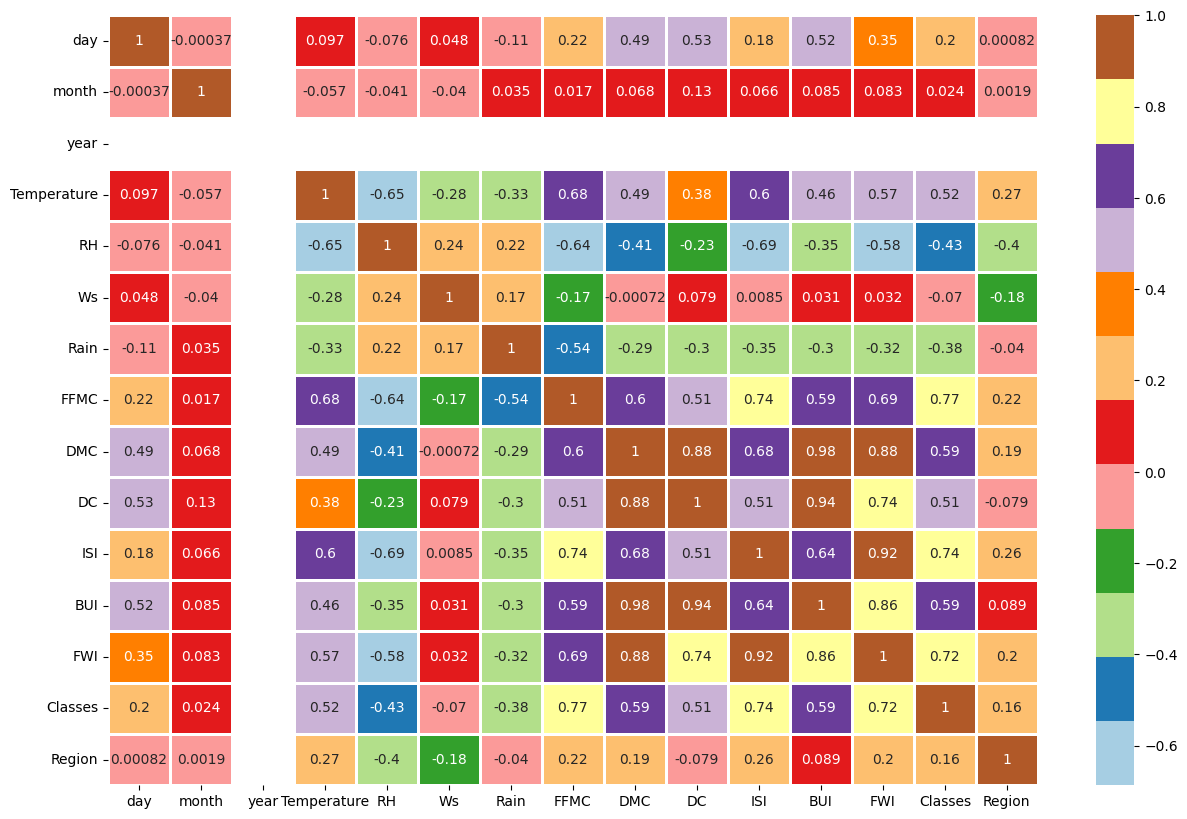

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),annot= True,linewidths=1, linecolor="white", cbar=True,
            cmap = "Paired",xticklabels="auto", yticklabels="auto")

In [33]:
# Check counts
new_df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

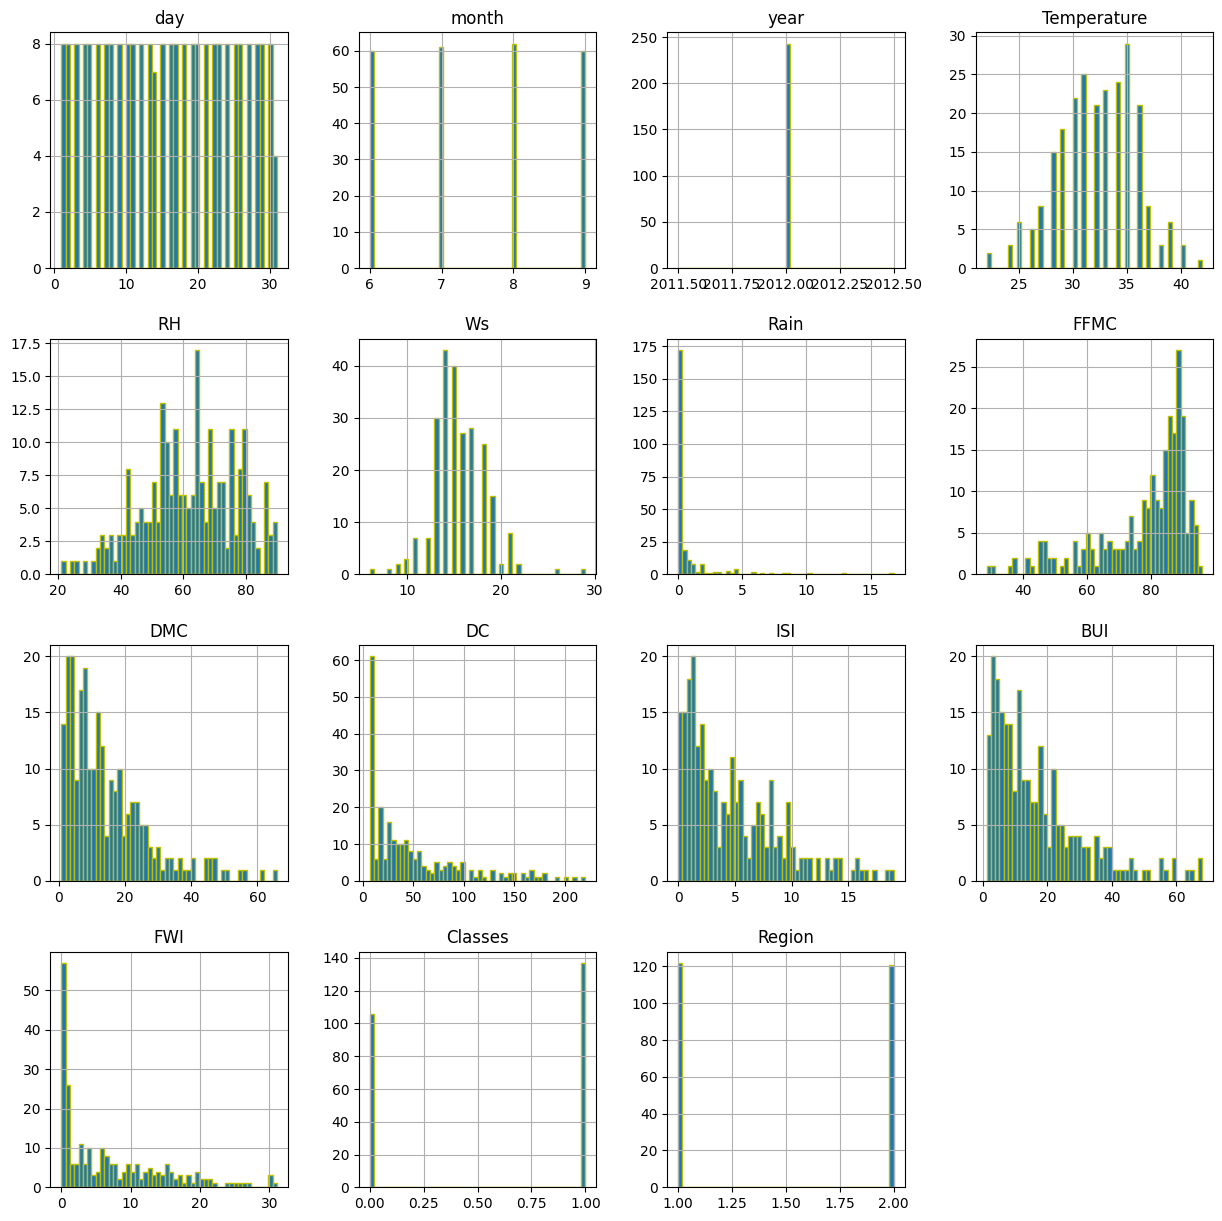

In [34]:
# density plot for all features
new_df.hist(bins=50, figsize=(15,15), ec = 'y')
plt.show()

In [35]:
# Percentage for PieChart
percentage = new_df.Classes.value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

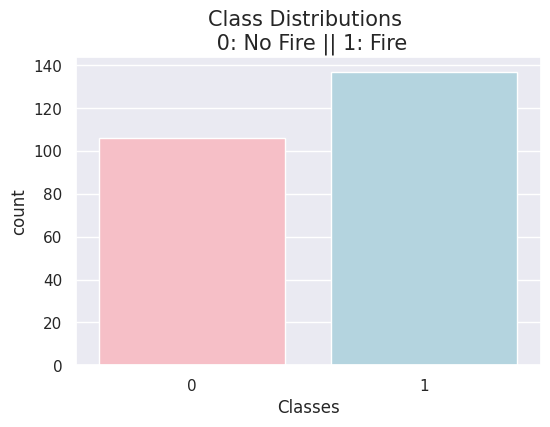

In [36]:
sns.set(rc={'figure.figsize':(6,4)})
custom_palette = ["lightpink", "lightblue"]
sns.countplot(x= 'Classes', data=new_df, palette=custom_palette)
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=15)

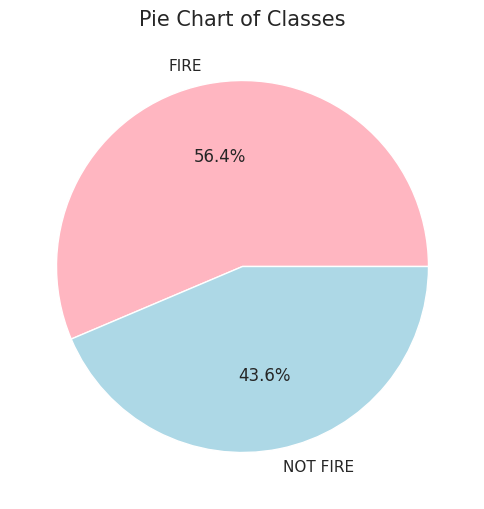

In [37]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(6, 8))
custom_colors = ["lightpink", "lightblue"]
plt.pie(percentage,labels = classeslabels, autopct='%1.1f%%', colors=custom_colors)
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

**Monthwise Fire Analysis**

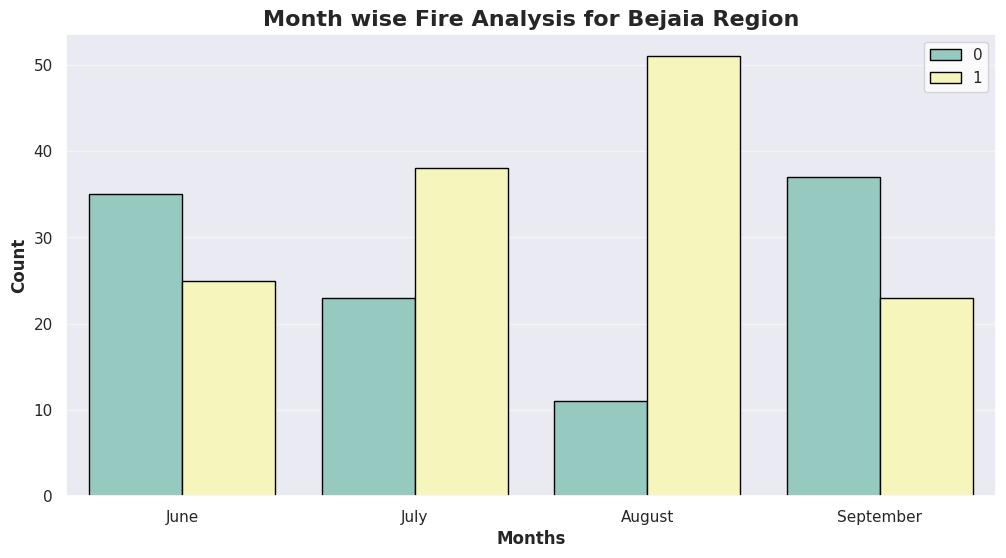

In [38]:
dftemp= new_df.loc[new_df['Region']== 1]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= new_df,ec = 'black', palette= 'Set3')
plt.title('Month wise Fire Analysis for Bejaia Region', fontsize=16, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

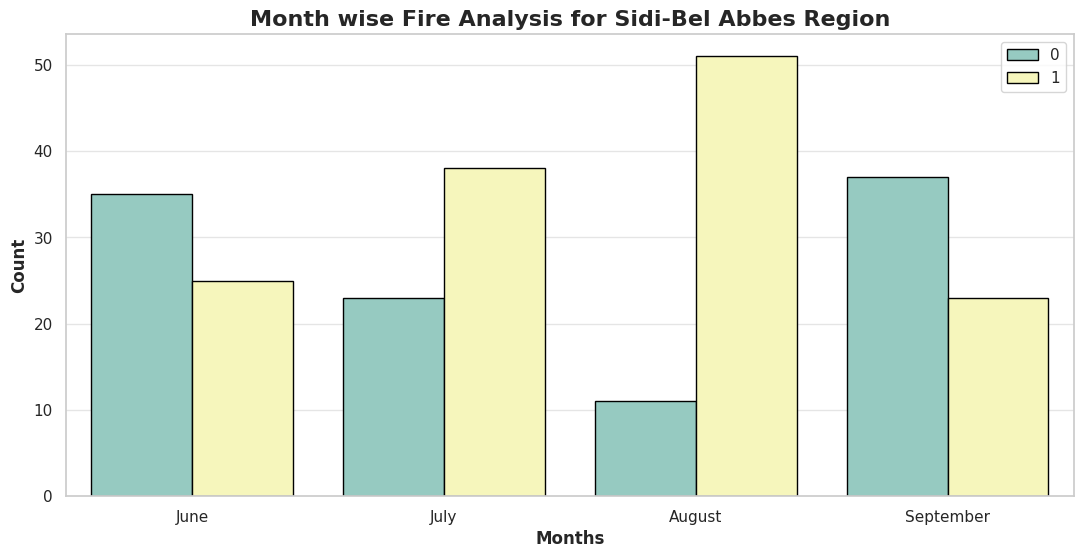

In [39]:
dftemp= new_df.loc[new_df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= new_df,ec = 'black', palette= 'Set3')
plt.title('Month wise Fire Analysis for Sidi-Bel Abbes Region', fontsize=16, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [40]:
#Droping features ['day','month','year'] beacuse it is not important for analysis
df2 = new_df.drop(['day','month','year'], axis=1)
df2.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


**Spliting the dataset into input and output feature**

In [41]:
a = df2.iloc[:,0:10]
b= df2['FWI']

In [42]:
a.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [43]:
b.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

**Spliting the dataset into train and test**

In [44]:
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.25,
                                                    random_state=0)
a_train.shape, a_test.shape

((182, 10), (61, 10))

In [45]:
a_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [46]:
a_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.918573
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.855633
FWI,0.575406,-0.594299,0.013239,-0.326426,0.704563,0.882314,0.746551,0.918573,0.855633,1.000000


Considering Correlation thresold value as 0.8. Check the correlation for independent features and the features having correlation more than 0.8 will remove from the analysis.

In [47]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [48]:
corr_features = correlation(a_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

These three features are there which has correlation more than 0.8 so we will remove it

In [49]:
a_train.drop(corr_features,axis=1, inplace=True)
a_test.drop(corr_features,axis=1, inplace=True)
a_train.shape, a_test.shape

((182, 7), (61, 7))

**Scalling**

In [50]:
def scaler_standard(a_train, a_test):
    scaler = StandardScaler()
    a_train_scaled = scaler.fit_transform(a_train)
    a_test_scaled = scaler.transform(a_test)

    return a_train_scaled, a_test_scaled

In [51]:
a_train_scaled, a_test_scaled = scaler_standard(a_train, a_test)

# **Classification**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [53]:
a = df2.iloc[:, 0:10]
b = df2['Classes']

In [54]:
a.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [55]:
b.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

In [56]:
# splitting dataset into train and test
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.3,random_state=0)
a_train.shape, a_test.shape

((170, 10), (73, 10))

In [57]:
a_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [58]:
corr_features = correlation(a_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

In [59]:
a_train.drop(corr_features,axis=1, inplace=True)
a_test.drop(corr_features,axis=1, inplace=True)
a_train.shape, a_test.shape

((170, 7), (73, 7))

In [60]:
a_train_scaled, a_test_scaled = scaler_standard(a_train, a_test)

**Random Forest**

In [61]:
rd_Classifier = RandomForestClassifier()
rd_Classifier.fit(a_train_scaled,b_train)

RandomForestClassifier()

In [62]:
print("Training Score:",rd_Classifier.score(a_train_scaled, b_train))
print("Test Score:",rd_Classifier.score(a_test_scaled,b_test))

Training Score: 1.0
Test Score: 0.958904109589041


In [63]:
rd_Classifier_prediction = rd_Classifier.predict(a_test_scaled)
rd_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [64]:
AP = pd.DataFrame({'Actual Value': b_test, 'Predicted Value': rd_Classifier_prediction})
AP

,Actual Value,Predicted Value
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [65]:
rd_Score = accuracy_score(b_test,rd_Classifier_prediction)
Classification_Report = classification_report(b_test,rd_Classifier_prediction)

print("Random Forest")
print ("Accuracy Score: {:.4f}".format(rd_Score))
print (Classification_Report)

Random Forest
Accuracy Score: 0.9589
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.93      0.96        43

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



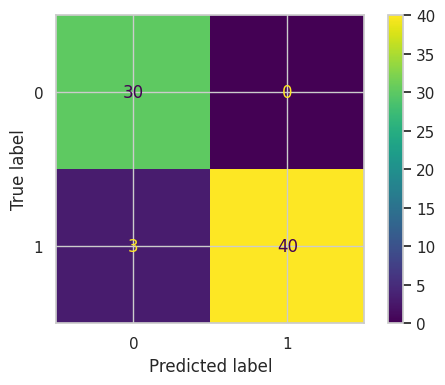

In [66]:
rd_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(rd_Classifier, a_test_scaled, b_test)
rd_Classifier_Confusion_Matrix

**XGboost Model**

In [67]:
xgb = XGBClassifier()
xgb.fit(a_train_scaled,b_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
print("Training Score:",xgb.score(a_train_scaled, b_train))
print("Test Score:",xgb.score(a_test_scaled,b_test))

Training Score: 0.9941176470588236
Test Score: 0.9726027397260274


In [69]:
xgb_predic = xgb.predict(a_test_scaled)
xgb_predic

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [70]:
Actual_predicted = pd.DataFrame({'Actual Revenue': b_test, 'Predicted Revenue': xgb_predic})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [71]:
Score = accuracy_score(b_test, xgb_predic)
Classification_Report = classification_report(b_test, xgb_predic)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

XGboost Classifier
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



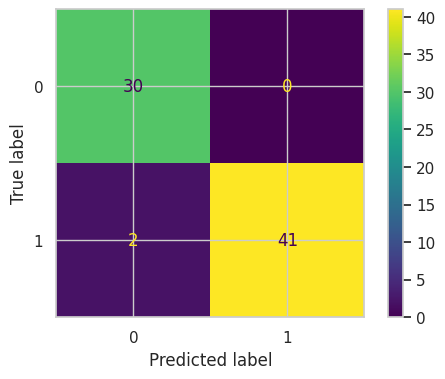

In [72]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, a_test_scaled, b_test)

**Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGboost classifier     | 97.26 % |
| Random Forest Classifier  | 97.26 % |

# **HyperParameter Tuning**

**XGboost classifier Tuning**

In [73]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(a_train_scaled, b_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=7.171717171717171,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=43, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
Best_xgb = Random_xgb.best_estimator_
Best_xgb.score(a_test_scaled,b_test)

0.9726027397260274

In [75]:
Bestxgb_prediction = Best_xgb.predict(a_test_scaled)
Bestxgb_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [76]:
Actual_predicted = pd.DataFrame({'Actual Revenue': b_test, 'Predicted Revenue': Bestxgb_prediction})
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [77]:
Score = accuracy_score(b_test, Bestxgb_prediction)
Classification_Report = classification_report(b_test,Bestxgb_prediction)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL XGB
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



**Random Forest classifier Tuning**

In [78]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
Random_rd = RandomizedSearchCV(rd_Classifier, params, cv = 10,n_jobs = -1)
Random_rd.fit(a_train_scaled, b_train).best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=14, max_features='auto',
                       min_samples_leaf=4, min_samples_split=3,
                       n_estimators=115)

In [79]:
Best_rd = Random_rd.best_estimator_
Best_rd.score(a_test_scaled,b_test)

0.9726027397260274

In [80]:
Bestrd_pred = Best_rd.predict(a_test_scaled)
Bestrd_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [81]:
AP = pd.DataFrame({'Actual Value': b_test, 'Predicted Value': Bestrd_pred})
AP

,Actual Value,Predicted Value
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [82]:
Score = accuracy_score(b_test, Bestrd_pred)
Classification_Report = classification_report(b_test,Bestrd_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL Random Forest
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



- From the above result XGBoost Classifier and random forest has given same Results so will proceed with random forest for model Deployment.

- For the web app, I will use the 5 most important features that are helpful in predicting the fire since we it would be pain to front end user to fill all 8 features on the web app.

- I will drop the rest of features so we can build an interactive and user friendly web app.

**Fetaure Selection for Model Deployment**

In [83]:
feature_importances = Random_rd.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': a_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
6,ISI,0.357562
4,FFMC,0.350642
5,DMC,0.136621
3,Rain,0.096480
0,Temperature,0.033765
1,RH,0.020567
2,Ws,0.004362


Text(0, 0.5, 'Features')

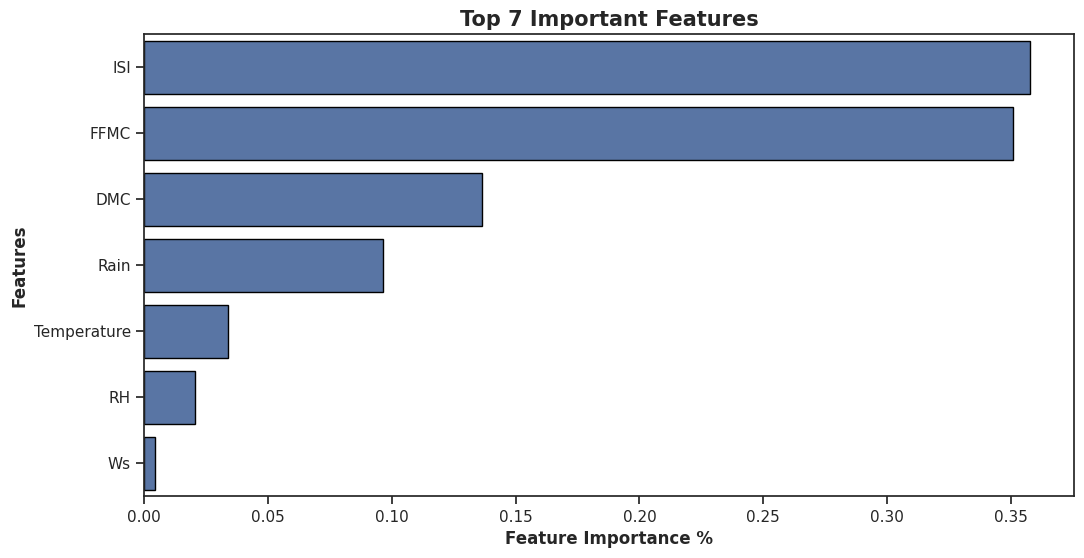

In [84]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')